# REGRESSÃO - BANCO DE DADOS DIABETES
Etapas visualizaturas:
- Empregando regressão linear
- Empregando regressão Ridge
- Empregando regressão Lasso
- Intercomparando resultados de Ridge, Lasso e Linear
- Avaliando performance através do Erro Quadrático Médio dos três

Erro Quadrático Médio: 2900.1936284934814
Erro Absoluto Médio: 42.79409467959994


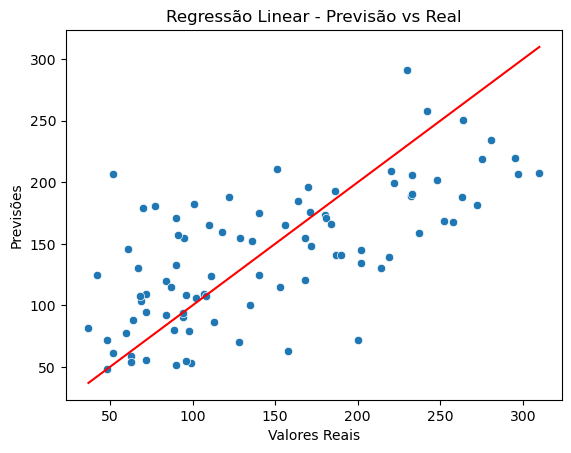

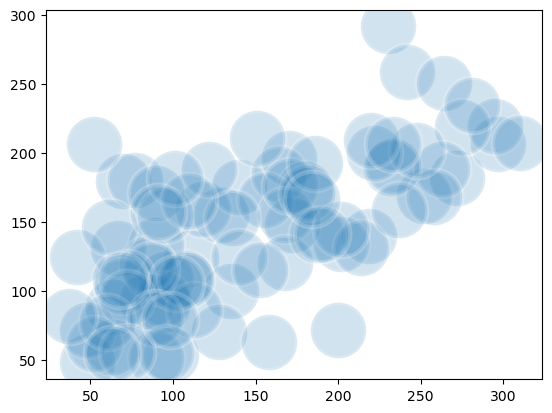

In [1]:
# importando módulos para regressão linear
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Carregando o conjunto de dados Diabetes
data = load_diabetes()
# Obtendo o conjunto de dados completo com 10 dimensões
X = pd.DataFrame(data.data, columns=data.feature_names)
# Obtendo o "alvo de regressão" Se as_frame=True Então Ret pandas.Series
y = data.target

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Obter a métrica para comparação com as demais regressões exigidas
mse = mean_squared_error(y_test, y_pred)
mseLin = mse
print(f"Erro Quadrático Médio: {mse}")
print(f"Erro Absoluto Médio: {mean_absolute_error(y_test, y_pred)}")

# Visualizar a relação entre variáveis para este dataset
sns.scatterplot(x=y_test, y=y_pred)
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red')
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Regressão Linear - Previsão vs Real")
plt.show()

#Visualizar melhor a disperção dos pontos plotados
sns.scatterplot(x=y_test, y=y_pred, s=1600, alpha=0.20)
plt.show()


A regressão linear para o conjunto de dados diabetes apresentou erro quadrático médio de aproximadamente 5217.192768
Ou seja, ~5217 vezes maior que o apresentado para o conjunto de dados california housing. Isso indica que é necessário adotar outro modelo que minimize este valor absurdo de MSE que evidência diferência média entre valores reais e previstos.
Vê-se concentrações no canto inferior esquerdo (principal), centro e superior direito-central indicando linearidade.

# Regressão Ridge ?
A regressão Ridge trata-se de uma variação da regressão linear, difere da RL por adicionar um termo de regularização para evitar problemas como overfitting (situação em que não há boa generalização dos dados) e melhorar a generalização do modelo. Ela é particularmente útil quando tens muitas variáveis preditoras e/ou multicolinearidade entre elas.

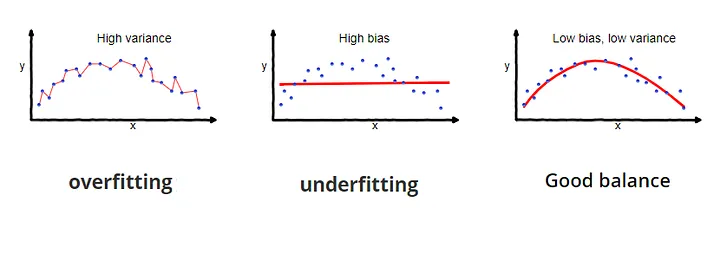

Erro quadrático médio (MSE): 3077.41593882723
Erro Absoluto Médio: 46.13885766697452
Coeficientes: [  45.36737726  -76.66608563  291.33883165  198.99581745   -0.53030959
  -28.57704987 -144.51190505  119.26006559  230.22160832  112.14983004]
Intercepto: 152.241675211113


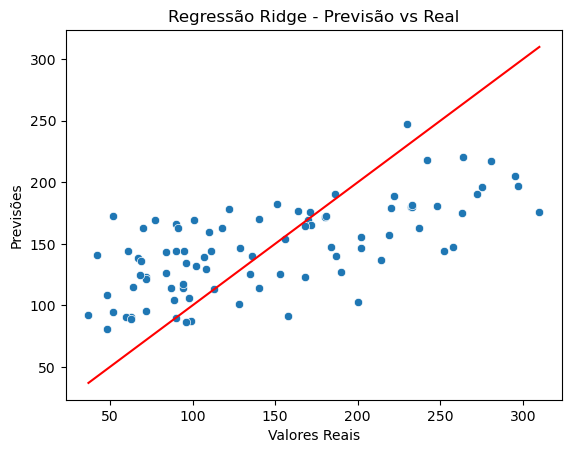

In [2]:
# Aplicando a Ridge
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = 0, 0, 0, 0

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regressão Ridge
ridge = Ridge(alpha=1.0) # alpha como o parâmetro lambda
ridge.fit(X_train, y_train)

# Previsões
y_pred = ridge.predict(X_test)

mseRid = mean_squared_error(y_test, y_pred)
print("Erro quadrático médio (MSE):", mseRid)
print(f"Erro Absoluto Médio: {mean_absolute_error(y_test, y_pred)}")
print("Coeficientes:", ridge.coef_)
print("Intercepto:", ridge.intercept_)

# Avaliação
sns.scatterplot(x=y_test, y=y_pred)
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red')
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Regressão Ridge - Previsão vs Real")
plt.show()

Para a regressão Ridge o coeficiente de erro quadrático médio foi de 3077.41593882723
ou seja, 5536.000087 vezes maior que o apresentado por california housing e 1.061107061 vezes maior
que o MSE para regressão linear.

# Regressão Lasso ?
A regressão Lasso (Least Absolute Shrinkage and Selection Operator) consiste em um tipo de regressão linear que, da mesma forma como a Ridge, emprega regularização para melhorar a performance do modelo e evitar o overfitting. Difere de Ridge por usar a penalização L1 permitindo, assim, zerar os coeficientes de algumas variáveis, ou seja, ter uma seleção automatizada de variáveis.

Coeficientes das variáveis: [   0.         -152.66477923  552.69777529  303.36515791  -81.36500664
   -0.         -229.25577639    0.          447.91952518   29.64261704]
Intercepto: 151.57485282893947
Erro Quadrático Médio (MSE): 2798.1934851697188
Erro Absoluto Médio: 42.85442771664998
R² (Coeficiente de Determinação): 0.4718547867276227


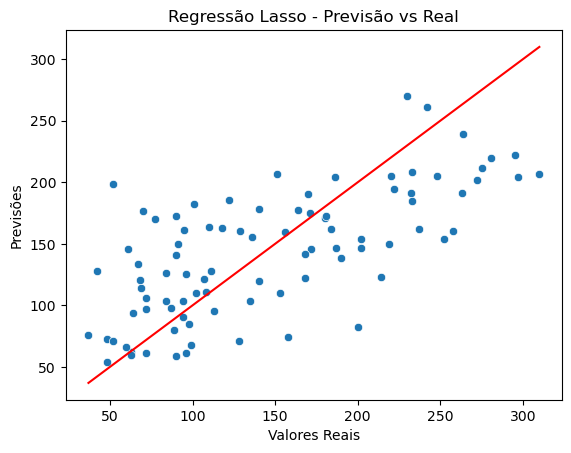

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Carregando o dataset de diabetes
diabetes = load_diabetes()
X = diabetes.data  # 10 variáveis preditoras
y = diabetes.target  # Progressão da doença

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de regressão Lasso
lasso = Lasso(alpha=0.1)  # alpha controla a regularização
lasso.fit(X_train, y_train)

# Previsões
y_pred = lasso.predict(X_test)

# Coeficientes do modelo
print("Coeficientes das variáveis:", lasso.coef_)
print("Intercepto:", lasso.intercept_)

# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
mseLas = mse
r2 = r2_score(y_test, y_pred)
print("Erro Quadrático Médio (MSE):", mse)
print(f"Erro Absoluto Médio: {mean_absolute_error(y_test, y_pred)}")
print("R² (Coeficiente de Determinação):", r2)

sns.scatterplot(x=y_test, y=y_pred)
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red')
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Regressão Lasso - Previsão vs Real")
plt.show()

Para a regressão Lasso o coeficiente de erro quadrático médio foi de 2798.1934851697188 continuando grande em comparação com o demonstrado em _california_housing_ e nas demonstrações anteriores.

Não foi possível distinguir diferenças significatvas nos resultados gráficos de cada execução.

## Comparação gráfica do erro quadrático médio para regressão linear, ridge e lasso:

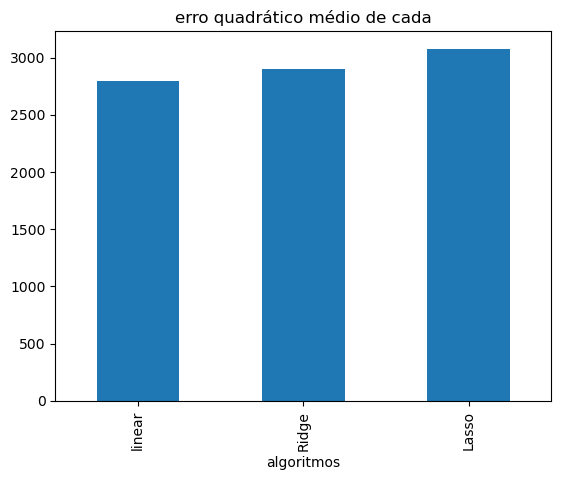

In [4]:
mseGeral = [mseLin,mseRid,mseLas]
d = {'algoritmos':["linear","Ridge","Lasso"],'erroQuadraticoMedio': sorted(mseGeral)}
df = pd.DataFrame(data=d)
ax = df.plot.bar(x='algoritmos', y='erroQuadraticoMedio', legend=False, title="erro quadrático médio de cada método")


Percebe-se o erro quadrático médio crescente como um indicativo de que a regressão linear é o método mais performático dentre os três. Lasso destaca-se por ter o maior MSE.